Importacao das bibliotecas que serao usadas

In [44]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

Funcao para upscaling de imagem

In [45]:
def upscale_image(image, scale=2):
    if isinstance(image, np.ndarray):
        return cv2.resize(image, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    else:
        raise ValueError("A imagem deve estar no formato numpy.ndarray")


Importacao do dataset e configuracao do transform

In [46]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda img: np.array(upscale_image(img.numpy().transpose(1, 2, 0), scale=7))),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) #Normalizar os canais de cor
])

Importacao dos datasets de treinamento e de avaliacao do CIFAR-10

In [47]:
train_dataset = torchvision.datasets.CIFAR10(
    root='../data', #Diretorio para salvar os datasets
    train=True, #Informa que os dados a serem baixados sao os de treinamento
    download=True, #Baixar os datasets automaticamente e os salva na pasta data
    transform=transforms #Aplicar as transformacoes (ToTensor e Normalizacao das cores)
)

Files already downloaded and verified


In [48]:
test_dataset = torchvision.datasets.CIFAR10(
    root='../data', #Diretorio para salvar os datasets
    train=False, #Informa que os dados a serem baixados sao os de teste do modelo
    download=True, #Baixar os datasets automaticamente e os salva na pasta data
    transform=transforms #Aplicar as transformacoes (ToTensor e Normalizacao das cores)
)

Files already downloaded and verified


Carregamento dos dados em lotes para teste de importacao e uso

In [49]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 4, shuffle = False)

Classes no CIFAR-10

In [50]:
classes = ('airplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Funcao para visualizar imagem

In [51]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))
    plt.show()

Obtendo as imagens em lotes

In [52]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

Mostrando as imagens que estao no dataset 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0035033226..1.0409755].


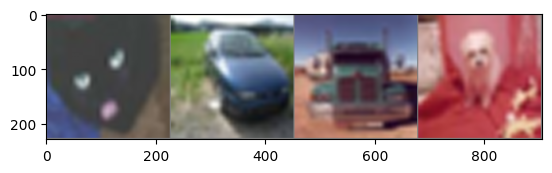

In [53]:
imshow(torchvision.utils.make_grid(images))

Mostrando os rotulos de cada imagem

In [54]:
print('Labels: ', ' '.join(classes[labels[j]] for j in range(4)))

Labels:  cat automobile truck dog
